<a href="https://colab.research.google.com/github/NallajallaSupreeth/Credit/blob/main/cre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install imbalanced-learn xgboost shap joblib


In [1]:
!pip install kagglehub imbalanced-learn xgboost

import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
# Download Lending Club dataset using kagglehub
path = kagglehub.dataset_download("wordsforthewise/lending-club")
print("Dataset downloaded to:", path)


Using Colab cache for faster access to the 'lending-club' dataset.
Dataset downloaded to: /kaggle/input/lending-club


In [3]:
import os

# List the contents of the downloaded directory
print(os.listdir(path))

['rejected_2007_to_2018Q4.csv.gz', 'accepted_2007_to_2018Q4.csv.gz', 'accepted_2007_to_2018q4.csv', 'rejected_2007_to_2018q4.csv']


In [4]:
import os

for root, dirs, files in os.walk(path):
    print("ROOT:", root)
    print("DIRS:", dirs)
    print("FILES:", files)
    print("-" * 60)


ROOT: /kaggle/input/lending-club
DIRS: ['accepted_2007_to_2018q4.csv', 'rejected_2007_to_2018q4.csv']
FILES: ['rejected_2007_to_2018Q4.csv.gz', 'accepted_2007_to_2018Q4.csv.gz']
------------------------------------------------------------
ROOT: /kaggle/input/lending-club/accepted_2007_to_2018q4.csv
DIRS: []
FILES: ['accepted_2007_to_2018Q4.csv']
------------------------------------------------------------
ROOT: /kaggle/input/lending-club/rejected_2007_to_2018q4.csv
DIRS: []
FILES: ['rejected_2007_to_2018Q4.csv']
------------------------------------------------------------


In [6]:
import pandas as pd

df = pd.read_csv("/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv.gz", low_memory=False)
df.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
needed = [
    "loan_status","loan_amnt","int_rate","term","installment","grade","sub_grade",
    "emp_length","home_ownership","annual_inc","verification_status","purpose","dti",
    "delinq_2yrs","fico_range_low","fico_range_high","open_acc","pub_rec","revol_bal",
    "revol_util","total_acc","application_type","mort_acc"
]

print([c for c in needed if c not in df.columns])


[]


In [9]:
print("Initial shape:", df.shape)


Initial shape: (2260701, 151)


Initial shape: (200000, 151)
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_sta

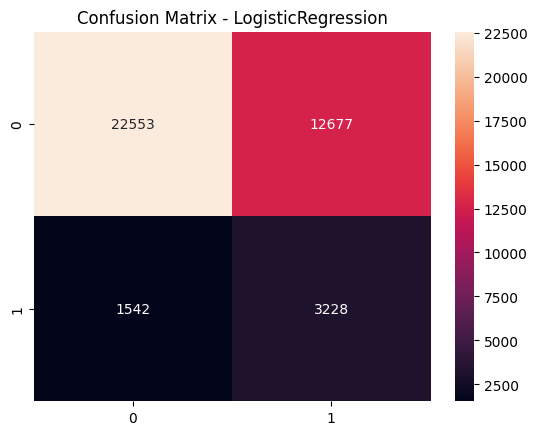

Saved pipeline to: models/LogisticRegression_pipeline.joblib

=== Training RandomForest ===
Classification report:
               precision    recall  f1-score   support

           0     0.8870    0.9798    0.9311     35230
           1     0.3441    0.0784    0.1277      4770

    accuracy                         0.8723     40000
   macro avg     0.6155    0.5291    0.5294     40000
weighted avg     0.8223    0.8723    0.8353     40000

ROC-AUC: 0.7077362418036373
PR-AUC (avg precision):


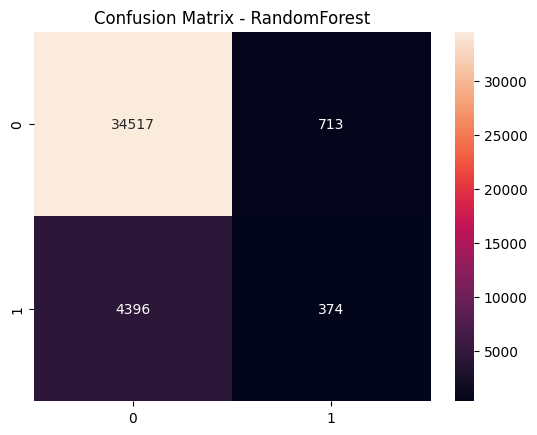

Saved pipeline to: models/RandomForest_pipeline.joblib

=== Training XGBoost ===
Classification report:
               precision    recall  f1-score   support

           0     0.8847    0.9914    0.9350     35230
           1     0.4184    0.0457    0.0824      4770

    accuracy                         0.8786     40000
   macro avg     0.6516    0.5186    0.5087     40000
weighted avg     0.8291    0.8786    0.8333     40000

ROC-AUC: 0.7284524011422987
PR-AUC (avg precision):


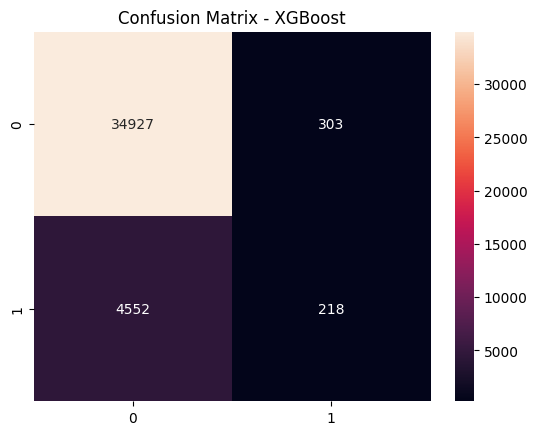

Saved pipeline to: models/XGBoost_pipeline.joblib


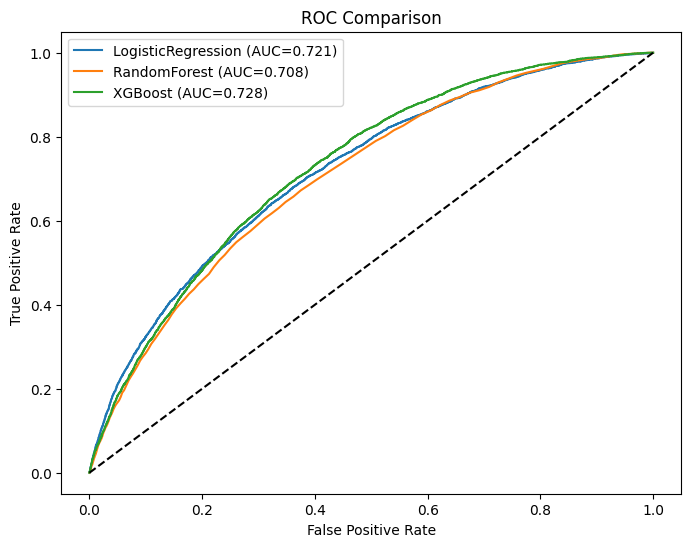

Running SHAP for XGBoost


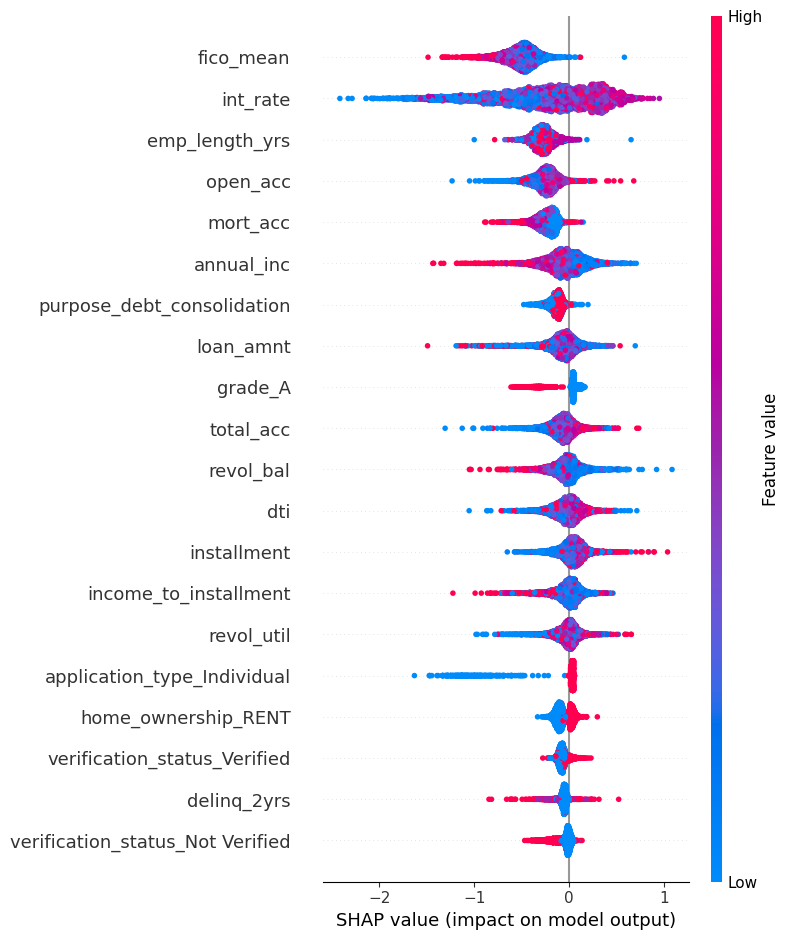

Best model by ROC-AUC: XGBoost
Saved test predictions to models/test_predictions_with_probs.csv


In [11]:
# ======= Credit Risk Pipeline (use after you loaded `df`) =======
# Assumes `df` is the DataFrame you printed above (loaded with selected columns).
# Installs (uncomment if needed):
# !pip install imbalanced-learn xgboost shap joblib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import shap
import warnings
warnings.filterwarnings("ignore")

# -------------- Quick data summary --------------
print("Initial shape:", df.shape)
print(df.columns.tolist())
print(df['loan_status'].value_counts().head())

# -------------- 1) Create target variable --------------
# default = 1 for Charged Off, else 0 (tweak as needed for "Default" definitions)
df['loan_status'] = df['loan_status'].astype(str)
df['default'] = df['loan_status'].apply(lambda x: 1 if 'Charged Off' in x else 0)
print("Default rate:", df['default'].mean())

# -------------- 2) Clean / parse basic columns --------------
# Convert interest rate to numeric (remove %)
if df['int_rate'].dtype == object:
    df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)

# Parse term -> numeric months
df['term_months'] = df['term'].str.extract('([0-9]+)').astype(float)

# Emp_length: convert '10+ years', '< 1 year', 'n/a' etc. to numeric years
def parse_emp_length(x):
    x = str(x).strip()
    if x in ('n/a','NaN','nan','None',''):
        return np.nan
    if '<' in x:
        return 0.0
    try:
        return float(x.split()[0].replace('+',''))
    except:
        return np.nan

df['emp_length_yrs'] = df['emp_length'].apply(parse_emp_length)

# revol_util sometimes has '%' or is object
if df['revol_util'].dtype == object:
    df['revol_util'] = df['revol_util'].str.rstrip('%').replace('', np.nan).astype(float)

# Fill numeric columns' NA later with median
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
print("Numeric columns:", numeric_cols)

# -------------- 3) Optional: create a manageable sample (200k rows) --------------
SAMPLE_PATH = os.path.join(path, "accepted_sample_200k.csv")
if os.path.exists(SAMPLE_PATH):
    print("Loading sample for faster runs:", SAMPLE_PATH)
    df_sample = pd.read_csv(SAMPLE_PATH, low_memory=False)
    # ensure 'default' exists
    if 'default' not in df_sample.columns and 'loan_status' in df_sample.columns:
        df_sample['default'] = df_sample['loan_status'].apply(lambda x: 1 if 'Charged Off' in str(x) else 0)
    df = df_sample
else:
    # If you prefer not to sample, skip this and use full df.
    print("Creating in-memory sample (200k rows) for speed...")
    desired_n = 200000
    if len(df) > desired_n:
        df = df.sample(n=desired_n, random_state=42).reset_index(drop=True)
    print("Sampled shape:", df.shape)

# -------------- 4) Select features for modeling --------------
# Use a mix of numeric features and selected categoricals
model_cols = [
    'loan_amnt', 'term_months', 'int_rate', 'installment', 'grade', 'sub_grade',
    'emp_length_yrs', 'home_ownership', 'annual_inc', 'verification_status',
    'purpose', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'application_type', 'mort_acc'
]

# Keep only columns that exist in df
model_cols = [c for c in model_cols if c in df.columns]
print("Using features:", model_cols)

df_model = df[model_cols + ['default']].copy()

# -------------- 5) Feature engineering --------------
# Example engineered features
if 'annual_inc' in df_model.columns and 'installment' in df_model.columns:
    df_model['income_to_installment'] = df_model['annual_inc'] / (df_model['installment'] + 1e-6)

if 'fico_range_low' in df_model.columns and 'fico_range_high' in df_model.columns:
    df_model['fico_mean'] = (df_model['fico_range_low'] + df_model['fico_range_high']) / 2
    df_model = df_model.drop(columns=[c for c in ['fico_range_low','fico_range_high'] if c in df_model.columns])

# cap extreme outliers for some numeric cols
for c in ['annual_inc','revol_bal','loan_amnt']:
    if c in df_model.columns:
        df_model[c] = df_model[c].clip(lower=0, upper=df_model[c].quantile(0.99))

# -------------- 6) Handle missing values & prepare X/y --------------
# Identify numeric & categorical features
num_feats = df_model.select_dtypes(include=['int64','float64']).columns.tolist()
num_feats = [c for c in num_feats if c != 'default']
cat_feats = df_model.select_dtypes(include=['object']).columns.tolist()
print("Numerics:", num_feats)
print("Categoricals:", cat_feats)

X = df_model.drop(columns=['default'])
y = df_model['default'].astype(int)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

# -------------- 7) Build preprocessing + SMOTE + model pipeline --------------
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False)) # Changed sparse=False to sparse_output=False
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, num_feats),
    ('cat', categorical_transformer, cat_feats)
], remainder='drop')

smote = SMOTE(random_state=42)

# Models to try
models = {
    'LogisticRegression': LogisticRegression(max_iter=2000, class_weight='balanced'),
    'RandomForest': RandomForestClassifier(n_estimators=200, class_weight='balanced', n_jobs=-1, random_state=42),
    'XGBoost': xgb.XGBClassifier(n_estimators=300, use_label_encoder=False, eval_metric='logloss', random_state=42, n_jobs=-1)
}

# Train & evaluate function
def train_eval_model(model_name, model):
    print("\n=== Training", model_name, "===")
    pipe = ImbPipeline(steps=[
        ('preprocess', preprocessor),
        ('smote', smote),
        ('clf', model)
    ])
    pipe.fit(X_train, y_train)
    # predict
    y_pred = pipe.predict(X_test)
    y_proba = pipe.predict_proba(X_test)[:,1] if hasattr(pipe.named_steps['clf'], 'predict_proba') else pipe.decision_function(X_test)
    print("Classification report:\n", classification_report(y_test, y_pred, digits=4))
    print("ROC-AUC:", roc_auc_score(y_test, y_proba))
    print("PR-AUC (avg precision):"), average_precision_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    # save
    model_path = f"models/{model_name}_pipeline.joblib"
    os.makedirs('models', exist_ok=True)
    joblib.dump(pipe, model_path)
    print("Saved pipeline to:", model_path)
    return pipe

# -------------- 8) Run training for each model (this will take time) --------------
trained_pipes = {}
for name, m in models.items():
    trained_pipes[name] = train_eval_model(name, m)

# -------------- 9) Compare ROC curves --------------
plt.figure(figsize=(8,6))
from sklearn.metrics import roc_curve # Import roc_curve
for name, pipe in trained_pipes.items():
    y_proba = pipe.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate')
plt.title('ROC Comparison')
plt.legend()
plt.show()

# -------------- 10) Interpretability with SHAP (for tree model example) --------------
# Use RandomForest or XGBoost pipe (pick available tree model)
tree_pipe = trained_pipes.get('XGBoost') or trained_pipes.get('RandomForest')
if tree_pipe:
    print("Running SHAP for", 'XGBoost' if 'XGBoost' in trained_pipes else 'RandomForest')
    # get preprocessed feature names
    pre = tree_pipe.named_steps['preprocess']
    # Build small preprocessed sample to get feature names
    X_sample = X_train.sample(n=min(5000, len(X_train)), random_state=42)
    Xp = pre.transform(X_sample)
    # feature names from ColumnTransformer
    num_names = num_feats
    cat_names = list(pre.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_feats)) if len(cat_feats)>0 else []
    feature_names = num_names + cat_names
    # get model inside pipeline
    clf = tree_pipe.named_steps['clf']
    # SHAP explainer (TreeExplainer faster for tree models)
    try:
        explainer = shap.TreeExplainer(clf)
        shap_values = explainer.shap_values(Xp if hasattr(explainer,'shap_values') else Xp)
        # summary plot (uses matplotlib)
        shap.summary_plot(shap_values, Xp, feature_names=feature_names, show=True)
    except Exception as e:
        print("SHAP failed:", e)
else:
    print("No tree model available for SHAP in trained_pipes.")

# -------------- 11) Short summary save --------------
# Save test set predictions for future analysis
best_model_name = max(trained_pipes.keys(), key=lambda k: roc_auc_score(y_test, trained_pipes[k].predict_proba(X_test)[:,1]))
print("Best model by ROC-AUC:", best_model_name)
best_pipe = trained_pipes[best_model_name]
X_test['y_true'] = y_test
X_test['y_pred'] = best_pipe.predict(X_test)
X_test['y_proba'] = best_pipe.predict_proba(X_test)[:,1]
X_test.to_csv('models/test_predictions_with_probs.csv', index=False)
print("Saved test predictions to models/test_predictions_with_probs.csv")

# ======= End of pipeline ======